In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [83]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [84]:
X_test.shape

(10000, 32, 32, 3)

In [85]:
y_train.shape

(50000, 1)

In [86]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [87]:
y_train = y_train.reshape(-1,) #To convert 2D array to 1D array

In [88]:
y_train[0]

6

In [89]:
y_test = y_test.reshape(-1,)

In [90]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[y_train[0]]

'frog'

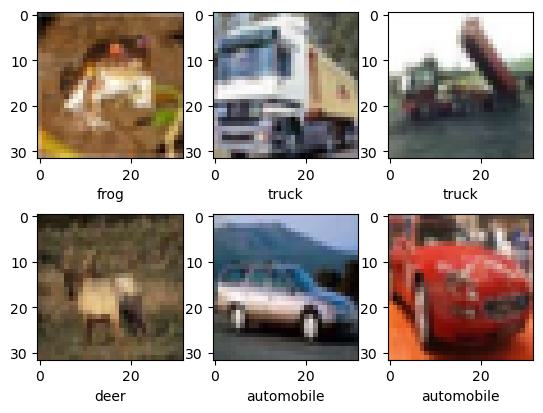

In [61]:
#plt.figure(figsize=(15,2))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i])
    plt.xlabel(classes[y_train[i]])

In [62]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

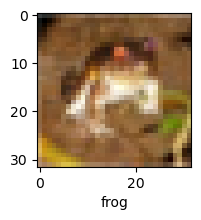

In [63]:
plot_sample(X_train, y_train, 0)

### NORMALIZATION

In [64]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple ANN for image classification

In [66]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 470s 299ms/step - loss: 1.8788 - accuracy: 0.3107
Epoch 2/5
1563/1563 [==============================] - 486s 311ms/step - loss: 1.6874 - accuracy: 0.3895
Epoch 3/5
1563/1563 [==============================] - 435s 278ms/step - loss: 1.5900 - accuracy: 0.4281
Epoch 4/5
1563/1563 [==============================] - 466s 298ms/step - loss: 1.5182 - accuracy: 0.4541
Epoch 5/5
1563/1563 [==============================] - 480s 307ms/step - loss: 1.4666 - accuracy: 0.4716


In [67]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 9s 22ms/step - loss: 1.4472 - accuracy: 0.4858


[1.4471811056137085, 0.48579999804496765]

### Create CNN to improve accuracy

In [75]:
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters=32, kernel_size=(3,3),activation = 'relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters=64, kernel_size=(3,3),activation = 'relu'),
        layers.MaxPooling2D((2,2)),
    
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 58s 35ms/step - loss: 2.1381 - accuracy: 0.2069
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.9971 - accuracy: 0.2762
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.9229 - accuracy: 0.3066
Epoch 4/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.8397 - accuracy: 0.3403
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.7936 - accuracy: 0.3577
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.7553 - accuracy: 0.3710
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.7230 - accuracy: 0.3820
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6910 - accuracy: 0.3942
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.6680 - accuracy: 0.4038
Epoch 10/10
1563/1563 [==============================] - 54s 34m

In [77]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.6287 - accuracy: 0.4180


[1.628740906715393, 0.4180000126361847]

In [78]:
y_pred = cnn.predict(X_test)
y_pred

313/313 [==============================] - 3s 8ms/step


array([[0.02293892, 0.07090539, 0.04037474, ..., 0.01073943, 0.17168677,
        0.01705209],
       [0.04562743, 0.26839218, 0.00335162, ..., 0.00054373, 0.45507878,
        0.21987937],
       [0.11409484, 0.24403399, 0.0093009 , ..., 0.00251326, 0.41960168,
        0.18836439],
       ...,
       [0.00806295, 0.01126759, 0.13961163, ..., 0.19394545, 0.00183705,
        0.00777151],
       [0.07875627, 0.02390688, 0.27523118, ..., 0.07008961, 0.01894315,
        0.01330965],
       [0.0183814 , 0.00475895, 0.10741475, ..., 0.46773717, 0.00318777,
        0.01635298]], dtype=float32)

In [79]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [80]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

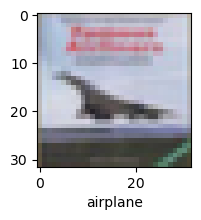

In [98]:
plot_sample(X_test, y_test,3)

In [99]:
classes[y_classes[3]]

'airplane'